У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

df = pd.read_csv('../data/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

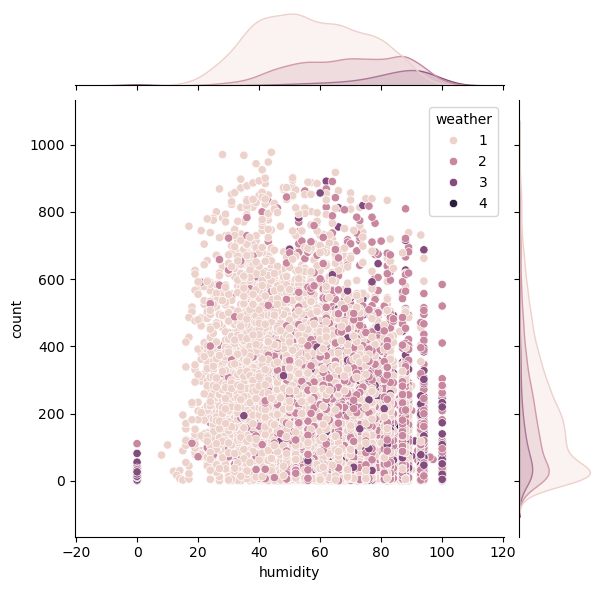

In [2]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather');

Існує слабка негативна кореляція між вологістю та кількістю орендованих велосипедів. Це означає, що зі збільшенням вологості кількість оренди, як правило, зменшується. Однак, ця залежність не є лінійною і має значну дисперсію, що свідчить про вплив інших факторів на кількість оренди.

Найбільша кількість оренди спостерігається при низькій вологості за ясної погоди. При середніх рівнях вологості та хмарній погоді кількість оренди також досить висока, хоча і менша, ніж за ясної погоди. За умов опадів (дощ, сніг) кількість оренди значно зменшується, особливо при високій вологості.

Графік не враховує інші фактори, такі як температура, сезон, вихідні дні, свята тощо, які також можуть впливати на кількість оренди.
Можливі аномалії в даних, наприклад, технічні збої в системі оренди або незвичайні погодні умови, які можуть спотворити загальну картину.

Компанія, що надає велосипеди в оренду, може використовувати ці дані для планування кількості велосипедів на станціях в залежності від прогнозу погоди.
Можна розробляти спеціальні пропозиції для клієнтів в дні з низькою орендою, пов'язані з несприятливими погодними умовами (наприклад, знижки на оренду дощовиків).

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

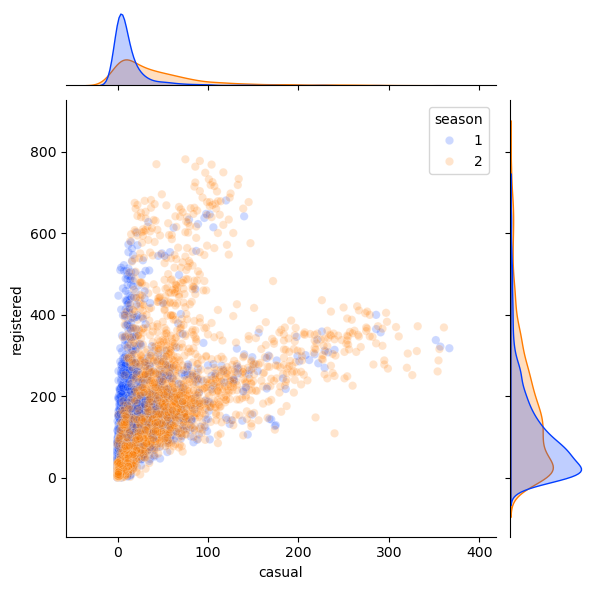

In [3]:
spring_and_summer_season = df[(df.season == 1) | (df.season == 2)]
sns.jointplot(data=spring_and_summer_season, x='casual', y='registered', hue='season', alpha=0.2, palette='bright');

Існує позитивна кореляція між кількістю випадкових та зареєстрованих користувачів. Це означає, що зі збільшенням кількості випадкових користувачів, як правило, збільшується і кількість зареєстрованих. Це може свідчити про те, що випадкові користувачі можуть з часом ставати постійними клієнтами.

Для весняного сезону характерна більша дисперсія даних. Це може свідчити про більшу мінливість попиту на велосипеди в цей період, що може бути пов'язано з нестабільними погодними умовами або іншими факторами. У літній сезон спостерігається більш щільне скупчення точок, що вказує на меншу дисперсію даних. Це може бути пов'язано з більш стабільним попитом на велосипеди в літній період, який традиційно вважається сезоном відпусток та активного відпочинку.

Компанія може розробляти більш інтенсивні маркетингові кампанії на початку весни для залучення нових клієнтів та стимулювання повторних відвідувань.
Можна запровадити спеціальні пропозиції для випадкових користувачів з метою перетворення їх на зареєстрованих. Наприклад, бонуси за першу реєстрацію, знижки на абонементи.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


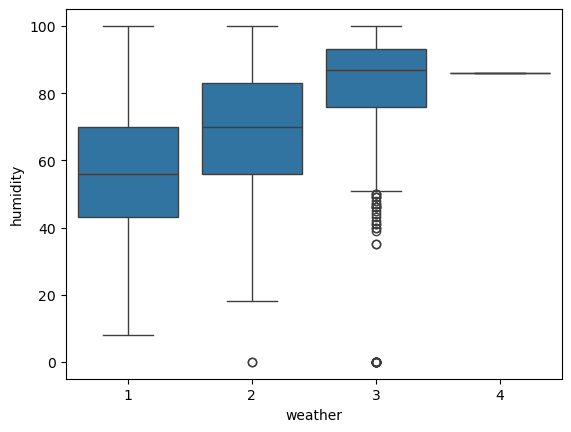

In [4]:
sns.boxplot(data=df, x='weather', y='humidity');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

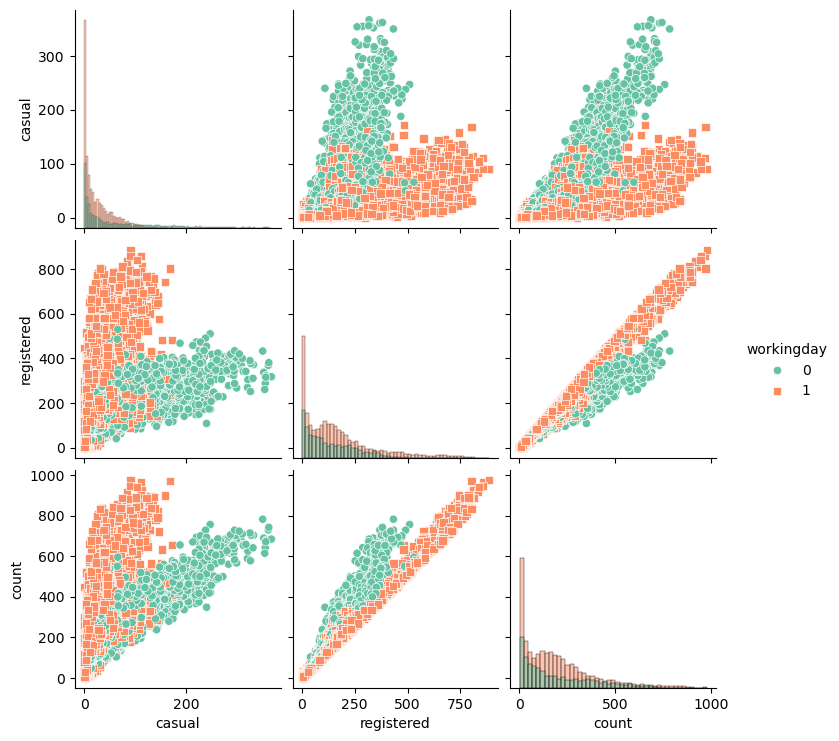

In [5]:
filtered_df = df[['workingday', 'casual', 'registered', 'count']]

pairplot = sns.pairplot(filtered_df, hue="workingday", palette="Set2", diag_kind="hist", markers=["o", "s"])
plt.show()

Між кількістю неформальних, зареєстрованих користувачів та загальною кількістю оренди існує сильна позитивна кореляція. Це означає, що зі збільшенням одного показника, як правило, збільшується і інший.

В робочі дні спостерігається більша кількість зареєстрованих користувачів, що логічно, оскільки багато людей використовують велосипеди для доїзду на роботу. У вихідні та святкові дні кількість неформальних користувачів, як правило, вища, що вказує на використання велосипедів для відпочинку та прогулянок.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [6]:
df.datetime = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

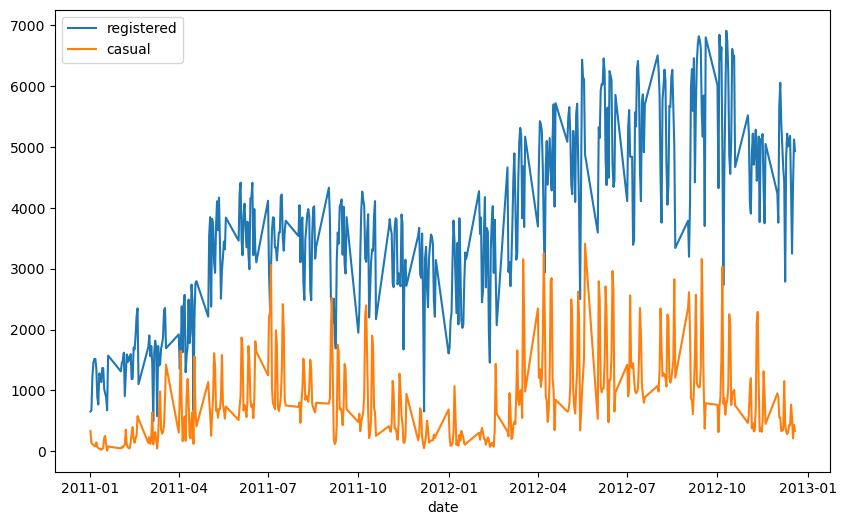

In [7]:
df['date'] = df['datetime'].dt.date

df_viz = df.groupby('date')[['registered', 'casual']].sum().reset_index()

ax = df_viz.plot(x='date', y=['registered', 'casual'], kind='line', figsize=(10, 6))
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
